(253, 13) <class 'numpy.ndarray'>


Text(0.5,1,'The graph of linear Regression and Gradient Descent ')

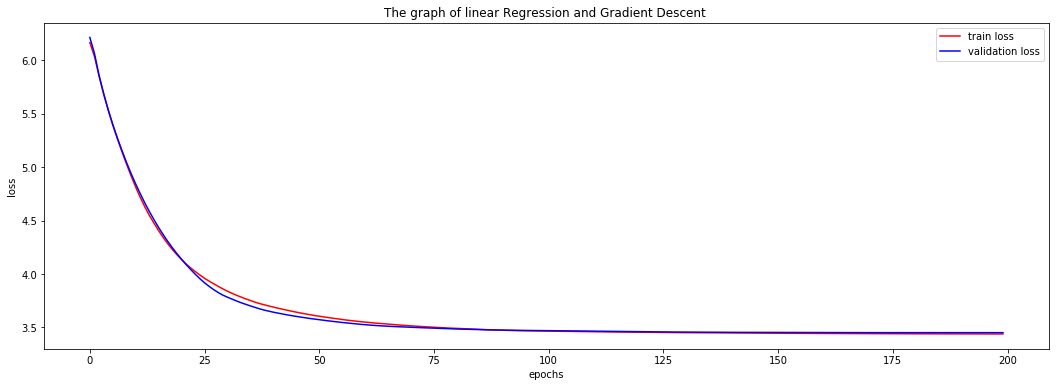

In [20]:
#This code  Done By:
#           Ezzaddin Ahmed Othman Saeed
#                 Taiz-Yemen
#------------------------------------------------

from sklearn.externals.joblib import Memory

#    STEP 1:

# Load the experiment data by import load_svmlight_file function in sklearn library

from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

mem.cache
def get_data():
    data = load_svmlight_file("./datasets/housing_scale")
    
    return data

X, Y = get_data()
X = X.data.reshape(X.shape)


###############################       #    STEP 2:  #          #####################################                            
# devide the dataset into traning set && validation set by train_test_split function

                              #  ===>> validation set isn't requier here  <===

from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.5)
#***********************************
print(X_train.shape,type(X_train)) #
#***********************************

#################################

#There are several ways to implement a linear regression
import numpy # here I used numpy  To do linear regression

n_samples_train, n_features = X_train.shape ### n_samples_train is trainning sample & n_features is number of features

X_train = numpy.concatenate((X_train,numpy.ones((n_samples_train,1))),axis=1)
Y_train = numpy.reshape(Y_train,(n_samples_train,1))

n_samples_validation, _ = X_validation.shape
X_validation = numpy.concatenate((X_validation,numpy.ones((n_samples_validation,1))),axis=1)
Y_validation = numpy.reshape(Y_validation,(n_samples_validation,1))

factor = 0.5 
learning_rate = 0.0008

         
    # #  # STEP 3:

              ######################## Initialize linear model parameters #######################
        
W = numpy.random.normal(0.01,0.1,size=(n_features + 1,1)) # initialize with zero normal distribution

losses_train = []
losses_val = []

max_loop = 200 ## total Iterations - No. Loops=200

for epoch in range(max_loop):
    diff = numpy.dot(X_train,W) - Y_train 
    G = factor * W + numpy.dot(X_train.transpose(),diff) # calculate the gradient
    G = -G 
    W = W + learning_rate * G # update the parameters
    
    Y_predict = numpy.dot(X_train,W) # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict-Y_train)) # calculate the absolute differences
    losses_train.append(loss_train)
    
    Y_predict = numpy.dot(X_validation,W) # predict under the validation set
    loss_val = numpy.average(numpy.abs(Y_predict-Y_validation)) # calculate the absolute differences
    losses_val.append(loss_val)
    
    #########################################
    
    %matplotlib inline
import matplotlib.pyplot as plt 

epoches = range(len(losses_train))
 
plt.figure(figsize=(18,6))
plt.plot(epoches,losses_train,"-",color="r",label="train loss") 
plt.plot(epoches,losses_val,"-",color="b",label="validation loss") 
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of linear Regression and Gradient Descent ")

    